In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull, convex_hull_plot_2d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from awpy.data import MAP_DATA

In [2]:
df = pd.read_parquet("../Outputs/esta-lan.parquet")

In [3]:
df.head()

,roundNum,tick,seconds,side,name,team,x,y,z,velocityX,...,ctAlivePlayers,ctUtility,tTeamName,tEqVal,tAlivePlayers,tUtility,matchID,mapName,tickRate,playbackTicks
0,1,2542,0.173228,CT,rain,FaZe Clan,323.210571,2424.029541,-120.750595,-114.030853,...,5,3,Team Vitality,4350,5,4,1373632b-521f-491e-b6f4-6f6e471eb2ff,de_dust2,127,275300
1,1,2542,0.173228,CT,broky,FaZe Clan,168.349991,2444.048584,-120.774506,-142.098022,...,5,3,Team Vitality,4350,5,4,1373632b-521f-491e-b6f4-6f6e471eb2ff,de_dust2,127,275300
2,1,2542,0.173228,CT,karrigan,FaZe Clan,363.949402,2346.634521,-120.257919,130.319138,...,5,3,Team Vitality,4350,5,4,1373632b-521f-491e-b6f4-6f6e471eb2ff,de_dust2,127,275300
3,1,2542,0.173228,CT,ropz,FaZe Clan,254.751923,2466.163086,-122.042831,-34.848892,...,5,3,Team Vitality,4350,5,4,1373632b-521f-491e-b6f4-6f6e471eb2ff,de_dust2,127,275300
4,1,2542,0.173228,CT,Twistzz,FaZe Clan,155.155777,2355.754150,-119.417885,-51.428085,...,5,3,Team Vitality,4350,5,4,1373632b-521f-491e-b6f4-6f6e471eb2ff,de_dust2,127,275300


In [4]:
data = df.loc[df.matchID == '046cdf91-97ab-4b8b-b19e-4c17ba3aa129']

In [5]:
sample = None
for name, df in data.groupby(['side','name']):
    sample = df
    break

In [6]:
sample.head()

,roundNum,tick,seconds,side,name,team,x,y,z,velocityX,...,ctAlivePlayers,ctUtility,tTeamName,tEqVal,tAlivePlayers,tUtility,matchID,mapName,tickRate,playbackTicks
13995031,1,3767,0.448819,CT,CRUC1AL,Endpoint.CeX,-416.000000,1504.000000,32.000584,0.000000,...,5,0,SINNERS Esports,4450,5,6,046cdf91-97ab-4b8b-b19e-4c17ba3aa129,de_ancient,127,375501
13995041,1,3831,0.952756,CT,CRUC1AL,Endpoint.CeX,-392.648712,1481.504517,27.418743,88.158813,...,5,0,SINNERS Esports,4450,5,6,046cdf91-97ab-4b8b-b19e-4c17ba3aa129,de_ancient,127,375501
13995048,1,3895,1.456693,CT,CRUC1AL,Endpoint.CeX,-356.336823,1374.810547,23.081455,72.766685,...,5,0,SINNERS Esports,4450,5,6,046cdf91-97ab-4b8b-b19e-4c17ba3aa129,de_ancient,127,375501
13995057,1,3959,1.960630,CT,CRUC1AL,Endpoint.CeX,-320.172241,1256.831909,39.572777,65.441360,...,5,0,SINNERS Esports,4450,5,5,046cdf91-97ab-4b8b-b19e-4c17ba3aa129,de_ancient,127,375501
13995067,1,4023,2.464567,CT,CRUC1AL,Endpoint.CeX,-289.686890,1135.609985,64.031250,63.419655,...,5,0,SINNERS Esports,4450,5,5,046cdf91-97ab-4b8b-b19e-4c17ba3aa129,de_ancient,127,375501


In [7]:
cam_ch = ConvexHull(sample[['viewX', 'viewY']].values, qhull_options='QJ')

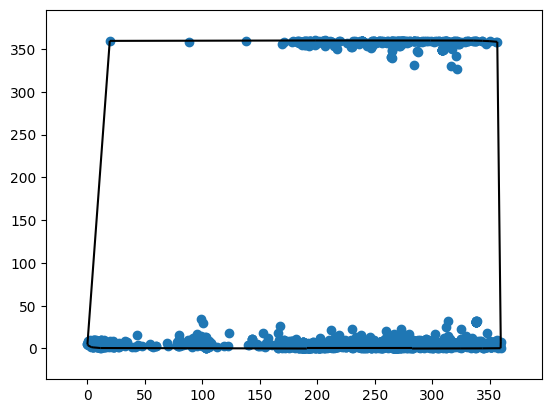

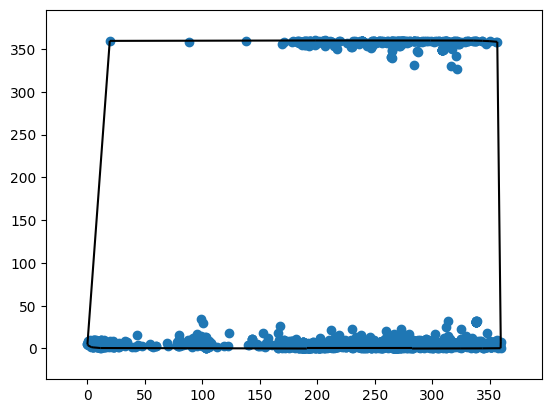

In [8]:
convex_hull_plot_2d(cam_ch)

In [9]:
move_ch = ConvexHull(sample[['x','y','z']].values, qhull_options='QJ')

In [10]:
move_ch.points

array([[-416.        , 1504.        ,   32.00058365],
       [-392.64871216, 1481.5045166 ,   27.41874313],
       [-356.33682251, 1374.81054688,   23.08145523],
       ...,
       [-251.82403564, -716.31335449,  165.51870728],
       [-251.82403564, -716.31335449,  165.51870728],
       [-251.82403564, -716.31335449,  165.51870728]])

In [78]:
def plot_convex_hull(points, ax=None, show=True, save_path=None,
                     point_size=10, point_color='k', hull_alpha=0.3, hull_color='red',
                     edge_color='k', elev=None, azim=None):

    pts = np.asarray(points)

    created_ax = False
    if ax is None:
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        created_ax = True

    # scatter the points if point_size > 0
    if point_size > 0:
        ax.scatter(pts[:, 0], pts[:, 1], pts[:, 2], s=point_size, c=point_color)

    hull = None
    if len(pts) >= 4:
        hull = ConvexHull(pts)
        faces = pts[hull.simplices]

        poly = Poly3DCollection(faces, alpha=hull_alpha)
        poly.set_facecolor(hull_color)
        poly.set_edgecolor(edge_color)
        ax.add_collection3d(poly)

        if edge_color != 'none':
            for simplex in hull.simplices:
                tri = pts[simplex]
                tri = np.vstack((tri, tri[0]))
                ax.plot(tri[:, 0], tri[:, 1], tri[:, 2], color=edge_color, linewidth=0.5)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    try:
        _set_axes_equal(ax)
    except Exception:
        pass

    # Apply rotation if specified
    if elev is not None or azim is not None:
        ax.view_init(elev=elev if elev is not None else ax.elev,
                     azim=azim if azim is not None else ax.azim)

    if save_path is not None and created_ax:
        plt.savefig(save_path, dpi=200, bbox_inches='tight')

    if show and created_ax:
        plt.tight_layout()
        plt.show()

    return ax, hull


def _set_axes_equal(ax):
    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    plot_radius = 0.5 * max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])

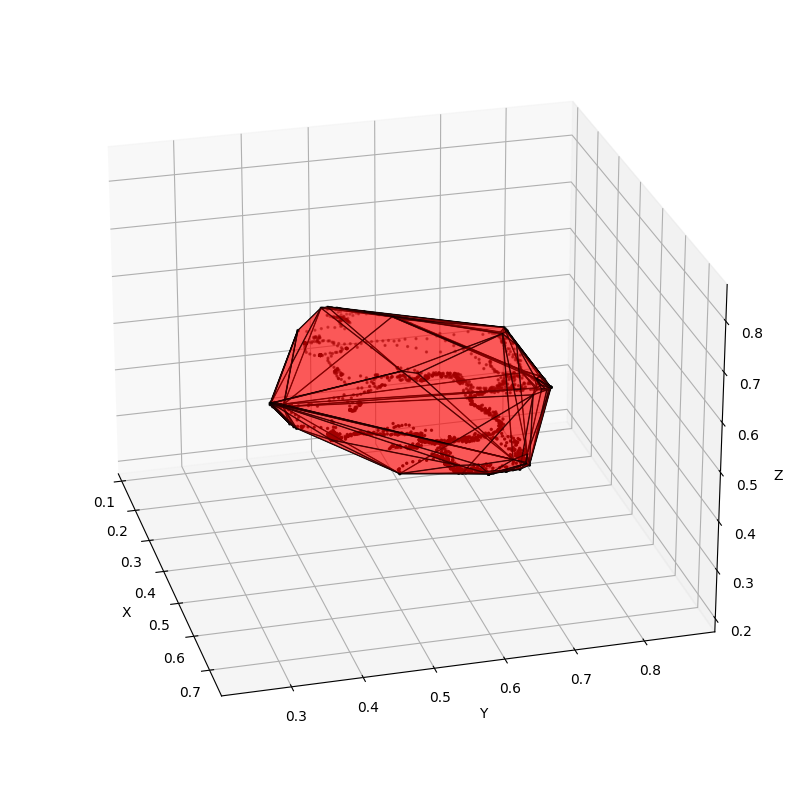

In [83]:
map = np.asarray(df.mapName)[0]
max_coordinate_val = int(np.max(np.abs([MAP_DATA.get(map).get('pos_x'), MAP_DATA.get(map).get('pos_y')])) + 1)
# Scale all points to within [0,1] for each axis
points = (move_ch.points + max_coordinate_val) / (2 * max_coordinate_val)

ax, hull = plot_convex_hull(points, show=True, save_path="../Outputs/ch_3d.png", edge_color='k', point_size = 2, point_color='k', elev=25, azim=-15, hull_alpha=0.4)

In [84]:
df = pd.read_parquet("../Outputs/cleaned-5-player-features-camera-halves.parquet")

In [85]:
df.head()

,matchID,mapName,side,team,p1_name,p2_name,p3_name,p4_name,p5_name,p1_ch_area,...,p5_C1,p5_C2,p5_C3,p5_C4,p5_C5,p5_alpha_d,p5_num_samples_d,p5_num_samples_j,p5_alpha_j,Label
0,035bfeb7-396b-4c48-b2aa-5f002c44b7c2,de_inferno,CT,Ninjas in Pyjamas,Plopski,REZ,es3tag,hampus,phzy,1424.941171,...,7.412956e-16,3907.747993,490.782712,28.556442,1211.922453,0.114353,227.0,2103.0,0.321310,de_inferno_CT
1,035bfeb7-396b-4c48-b2aa-5f002c44b7c2,de_inferno,T,G2 Esports,AmaNEk,JACKZ,NiKo,huNter-,kennyS,1438.385548,...,4.624237e-19,1451.341573,206.108728,26.573975,1111.879645,0.092903,165.0,1874.0,0.522223,de_inferno_T
2,046cdf91-97ab-4b8b-b19e-4c17ba3aa129,de_ancient,CT,Endpoint.CeX,CRUC1AL,MiGHTYMAX,Surreal,Thomas,mirbit,1411.646190,...,1.388183e-20,1255.468193,154.828216,18.984568,967.098412,0.086142,136.0,1646.0,0.487631,de_ancient_CT
3,046cdf91-97ab-4b8b-b19e-4c17ba3aa129,de_ancient,T,SINNERS Esports,NEOFRAG,SHOCK,ZEDKO,beastik,oskar,1423.206417,...,3.929766e-21,3847.744122,303.103004,36.246863,1364.386421,0.124951,269.0,2373.0,0.493187,de_ancient_T
4,0657c9fd-a475-4257-8879-265fdbfd59b0,de_mirage,CT,Natus Vincere,Boombl4,Perfecto,b1t,electronic,s1mple,1431.687738,...,1.034189e-19,1889.985536,339.417794,31.391679,1476.095799,0.121139,205.0,2526.0,0.498844,de_mirage_CT


In [91]:
import math

def sphere_coordinates(row):
    """Converts spherical coordinates (azimuth, elevation) to Cartesian coordinates on a unit sphere.

    Args:
        row: a pandas Series with 'viewX' (phi) and 'viewY' (theta) in radians.

    Returns:
        A pandas Series with x, y, z coordinates.
    """
    phi = row['viewX']
    theta = row['viewY']
    x = math.sin(theta) * math.cos(phi)
    y = math.sin(theta) * math.sin(phi)
    z = math.cos(theta)
    return pd.Series([x, y, z], index=['X', 'Y', 'Z'])

# Apply function to each row of sample DataFrame
sample[['X', 'Y', 'Z']] = sample.apply(sphere_coordinates, axis=1)


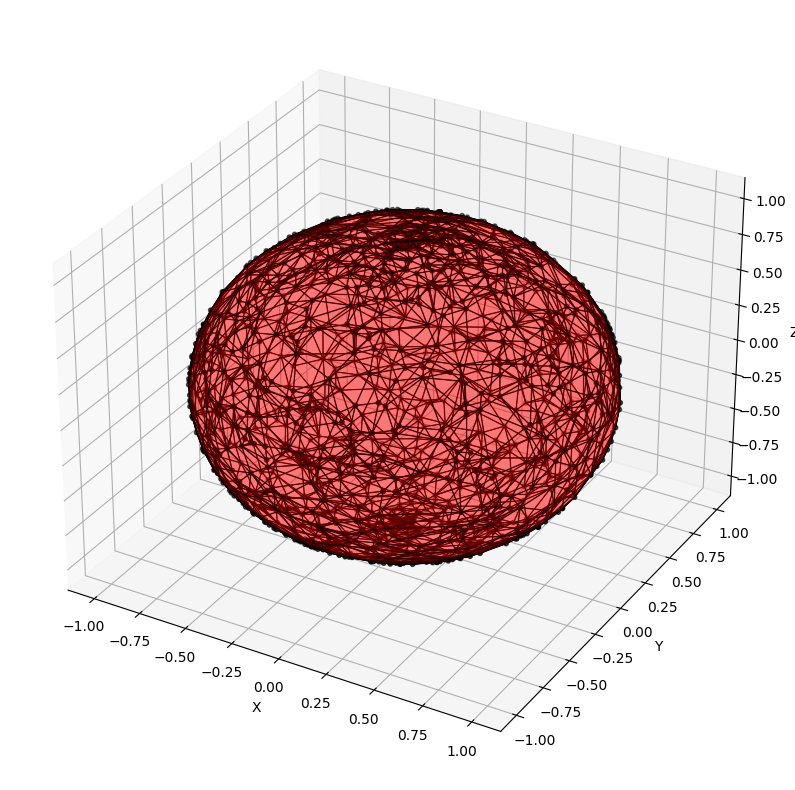

In [93]:
ax, hull = plot_convex_hull(sample[['X', 'Y', 'Z']])

In [94]:
hull.area

12.513414320665532

In [95]:
hull.volume

4.1534074839040445